## Forest fire simulation inspired by Hiroki Samaya's ca-forestfire.py
### Nicolas Gort Freitas




In [175]:

#%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np

random.seed()
empty, tree, fire, char = xrange(4)

def forest_simulator(initProb,time_limit,i=1,height=100,width=100):    
    time = 0
    stable_fire = None
    config = np.zeros([height, width])
    for x in xrange(width):
        for y in xrange(height):
            if random.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height/2, width/2] = fire

    nextConfig = np.zeros([height, width])
    burned_area = []
    
    while time < time_limit:
        burned_count = 0
        time += 1
        for x in xrange(width):
            for y in xrange(height):
                state = config[y, x]
                
                if state == char:
                    burned_count+=1
                elif state == fire:
                    state = char
                elif state == tree:
                    for dx in xrange(-1, 2):
                        for dy in xrange(-1, 2):
                            if config[(y+dy)%height, (x+dx)%width] == fire:
                                state = fire if random.random() < i else tree
                                    
                nextConfig[y, x] = state

        if len(burned_area)>1 and burned_count == burned_area[-2] and stable_fire == None:
            stable_fire = time
        burned_area.append(burned_count)
        config, nextConfig = nextConfig, config
    
    return {'burned_area':burned_area,'stable_fire':stable_fire}
    
    
#import pycxsimulator
burned_area = []
#pycxsimulator.GUI().start(func=[init_p(0.4),draw,step_count])


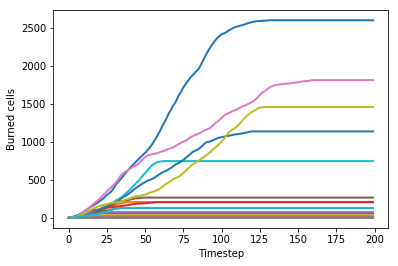

In [110]:

for i in range(20):
    axes[0].plot(forest_simulator(.3819660113,200)['burned_area'],linewidth=2)
    axes[1].plot(forest_simulator(.3819660113,200)['stable_fire'],linewidth=2)

axes[0].set_xlabel('Timestep')
axes[0].set_ylabel('Burned cells')
plt.show()

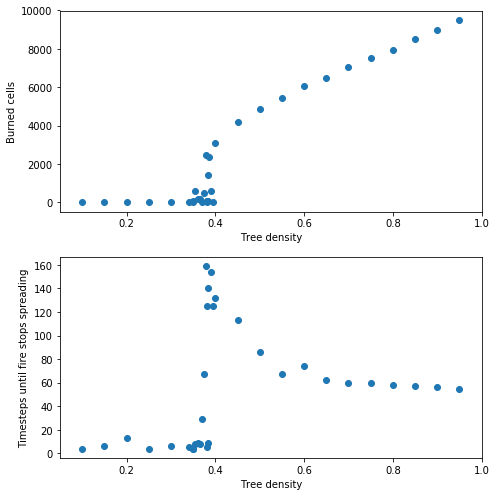

In [211]:
tree_density = [0.1,0.15,0.2,0.25,0.3,0.35,0.34,0.350,0.355,0.360,0.365,0.370,0.375,0.380,0.381,0.3815,0.382,0.383,0.384,0.385,0.390,0.395,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.90,0.95]
areas = []
stable_fire_time = []

fig, axes = plt.subplots(2,figsize=(7,7))

for p in tree_density:
    areas.append(forest_simulator(p,200)['burned_area'][-1])
    stable_fire_time.append(forest_simulator(p,200)['stable_fire'])

axes[0].scatter(tree_density,areas)
axes[1].scatter(tree_density,stable_fire_time)                            
                            
axes[0].set_xlabel('Tree density')
axes[0].set_ylabel('Burned cells')
axes[1].set_xlabel('Tree density')
axes[1].set_ylabel('Timesteps until fire stops spreading')
plt.tight_layout()
plt.show()

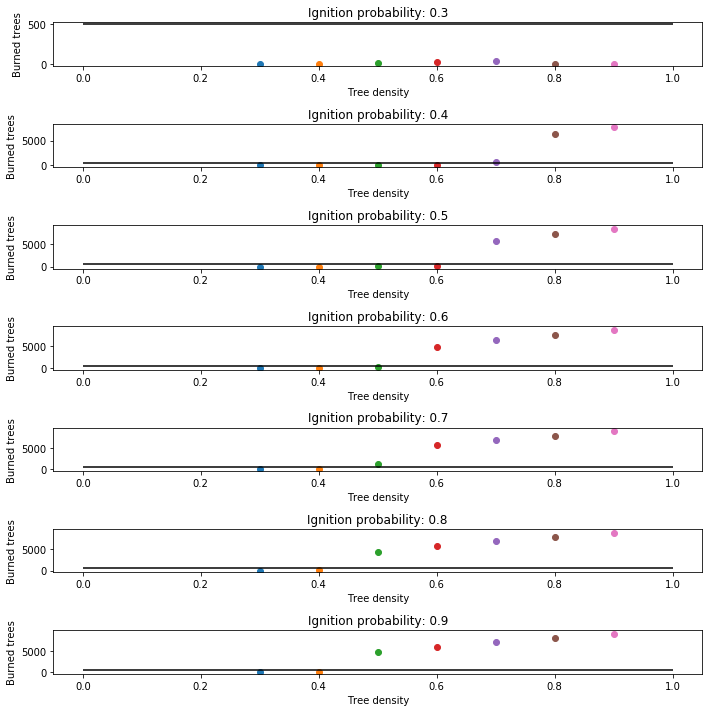

In [155]:
fig, axes = plt.subplots(7,figsize=(10,10))

for j,i in enumerate([0.3,0.4,0.5,0.6,0.7,0.8,0.9]):
    for k,q in enumerate([0.3,0.4,0.5,0.6,0.7,0.8,0.9]):
        axes[j].scatter(q,forest_simulator(q,200,i)['burned_area'][-1])
    axes[j].hlines(y=500,xmin=0,xmax=1)
    axes[j].set_title('Ignition probability: %s' %str(round(i,2)))
    axes[j].set_xlabel('Tree density')
    axes[j].set_ylabel('Burned trees')

plt.tight_layout()
plt.show()
        